# Other persistence measures

``plscan`` supports five persistence measures to evaluate the optimal minimum cluster size:

- 'size' persistence
- 'distance' persistence
- 'density' persistence
- 'size-distance' bi-persistence
- 'size-density' bi-persistence

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plscan import PLSCAN
from plscan._api import compute_distance_icicles, compute_density_icicles


plt.rcParams["figure.dpi"] = 150
plt.rcParams["figure.figsize"] = (2.75, 0.618 * 2.75)

data = np.load("data/clusterable/sources/clusterable_data.npy")

## Size persistence

The default persistence measure ("size") only considers at which
min_cluster_size values leaf-clusters exist. The leaf-tree visualizes these
size-ranges (i.e., persistences) for each leaf-cluster along the y-axis:

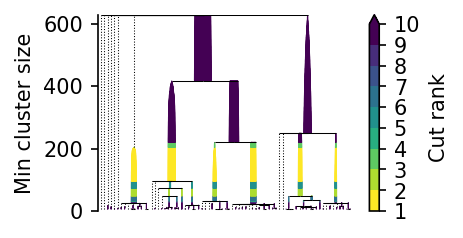

In [2]:
c_size = PLSCAN().fit(data)
c_size.leaf_tree_.plot(leaf_separation=0.1)
plt.show()

The persistence trace represents the sum of min_cluster_size persistences for
all leaf-clusters that exist at a particular min_cluster_size value. The higher
the total persistence, the "better" the clustering at that min_cluster_size value.

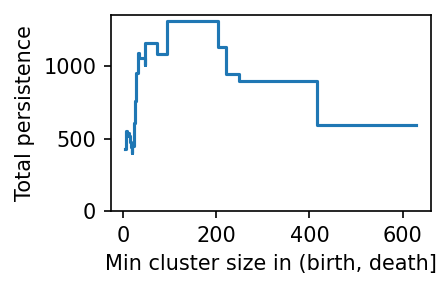

In [3]:
c_size.persistence_trace_.plot()
plt.show()

## Distance persistence

The "distance" persistence measure is very similar, but quantifies the
distance-range for which leaf-clusters exist. These values are not directly
visible in the leaf or condensed trees. A leaf-cluster starts to exist at the
distance its descendants form a connected component with the cluster's
births-size points.

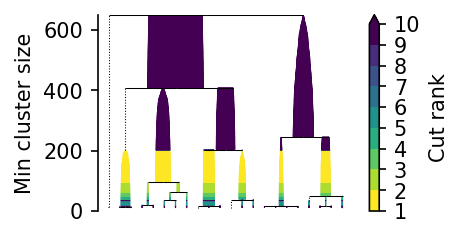

In [4]:
c_dist = PLSCAN(min_samples=10, persistence_measure="distance").fit(data)
c_dist.leaf_tree_.plot(leaf_separation=0.1)
plt.show()

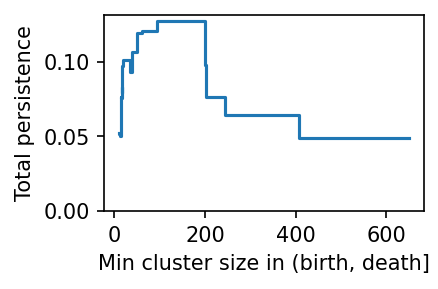

In [5]:
c_dist.persistence_trace_.plot()
plt.show()

## Density persistence

The distance-range can also be expressed in terms of density `exp(-dist)`.

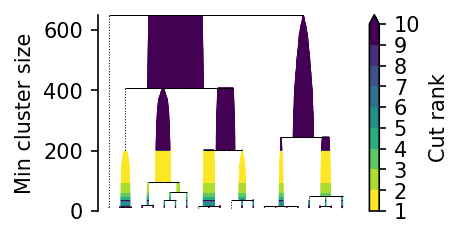

In [6]:
c_dens = PLSCAN(min_samples=10, persistence_measure="density").fit(data)
c_dens.leaf_tree_.plot(leaf_separation=0.1, width="density")
plt.show()

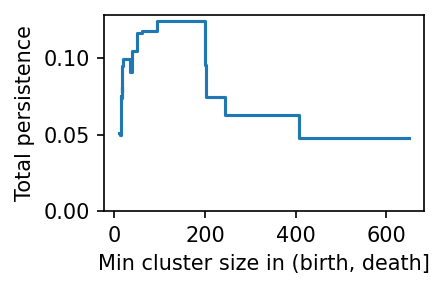

In [7]:
c_dens.persistence_trace_.plot()
plt.show()

## Size--distance bi-persistence

The size and distance persistences are combined by the "size-distance"
bi-persistence measure. Leaf clusters with low distance persistences get lower
bi-persistence values. For example, leaf-clusters at sizes below 100 have lower
relative total persistences and cut ranks in the plots below: 

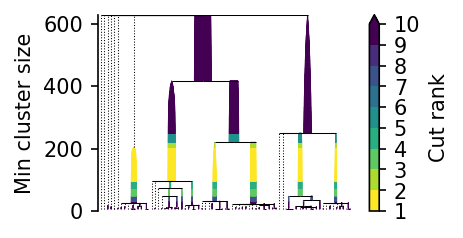

In [8]:
c_sdist = PLSCAN(persistence_measure="size-distance").fit(data)
c_sdist.leaf_tree_.plot(leaf_separation=0.1, width="distance")
plt.show()

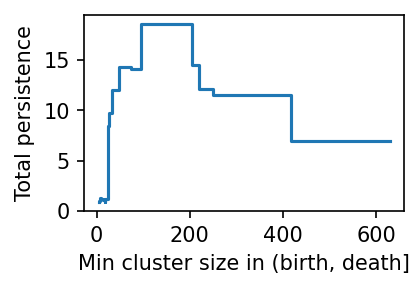

In [9]:
c_sdist.persistence_trace_.plot()
plt.show()

The bi-persistence value can be interpreted as an area. Specifically, it
represents the min_cluster_size -- distance parameter-area in which leaf
clusters exist. For example, the leaf-cluster with ID 16 exists in the colored
area:

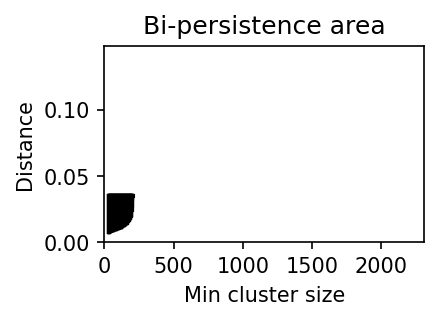

In [10]:
leaf_idx = 15
max_dist = c_sdist._leaf_tree.max_distance[leaf_idx]
size_trace, pers_trace = compute_distance_icicles(
    c_sdist._leaf_tree, c_sdist._condensed_tree, data.shape[0]
)
for size, pers in zip(size_trace[leaf_idx], pers_trace[leaf_idx]):
    plt.plot([size, size], [max_dist - pers, max_dist], "k-")
plt.xlim(0, data.shape[0])
plt.ylim(0, c_sdist._leaf_tree.max_distance[0])
plt.xlabel("Min cluster size")
plt.ylabel("Distance")
plt.title("Bi-persistence area")
plt.show()

## Size--density bi-persistence

The same bi-persistence can be expressed with densities. ``hdbscan`` uses ``1 /
distance`` to estimate densities. ``plscan``  uses ``exp(-distance)`` instead,
to avoid divisions by zero. Both transformations squash large distances into
near-zero densities. As a result, larger distances contribute less to
persistence values. (This data set does not produce a noticeable difference
between "size-distance" and "size-density".)

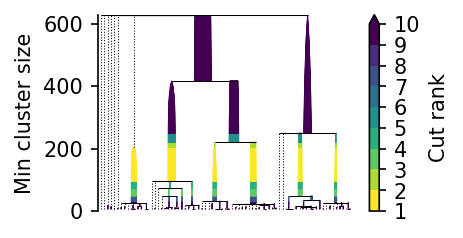

In [11]:
c_sdens = PLSCAN(persistence_measure="size-density").fit(data)
c_sdens.leaf_tree_.plot(leaf_separation=0.1, width="density")
plt.show()

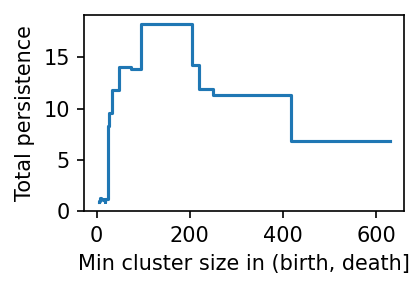

In [12]:
c_sdens.persistence_trace_.plot()
plt.show()

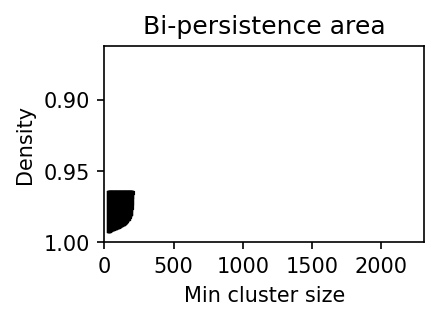

In [13]:
leaf_idx = 15
max_dist = np.exp(-c_sdens._leaf_tree.max_distance[leaf_idx])
size_trace, pers_trace = compute_density_icicles(
    c_sdens._leaf_tree, c_sdens._condensed_tree, data.shape[0]
)
for size, pers in zip(size_trace[leaf_idx], pers_trace[leaf_idx]):
    plt.plot([size, size], [max_dist + pers, max_dist], "k-")
plt.xlim(0, data.shape[0])
plt.ylim(1, np.exp(-c_sdens._leaf_tree.max_distance[0]))
plt.xlabel("Min cluster size")
plt.ylabel("Density")
plt.title("Bi-persistence area")
plt.show()